In [1]:
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
import warnings; warnings.simplefilter('ignore')
from sklearn import linear_model

# 2-A

In [2]:
#Generating data
x_given_data = np.array([-1, 0, 1, -2])
x2_train = x_given_data[:, np.newaxis]

y_given_data = np.array([1, 8, 5, -1])
y2_train = y_given_data

x_2 = np.linspace(start = -2, stop = 1, num = 50) #maximum amount of x is 1 and minimum amount is -2
y_2 = (2*x_2) - 1

In [3]:
#fitting model
model = linear_model.LinearRegression()
model.fit(x2_train, y2_train)
final = model.coef_ * x2_train + model.intercept_

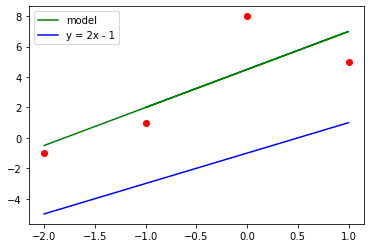

In [4]:
#plot 
plt.scatter(x_given_data, y_given_data, color = 'red')
plt.plot(x2_train, final, color = 'green', label = 'model')
plt.plot(x_2, y_2, color = 'blue', label = 'y = 2x - 1')
plt.legend()
plt.show()

# 3-A
## Generating random data with gaussian noise

In [5]:
def corr_vars(mu = 0, sigma = 2, func = lambda x: x ):
    # Generate 100 random x in the range of -100 to 100
    x = np.random.uniform(-100, 100, 100) 
     
    # Generate random noise with mu=average and sigma=variance
    e = np.random.normal(mu, sigma, x.size)
     
    # Generate y values as y = func(x) + e
    y = np.zeros(x.size)
     
    for index in range(x.size):
        y[index] = func(x[index]) + e[index]
     
    return (x,y)

In [6]:
(X, T) = corr_vars(mu = 0, sigma = 2, func = lambda x: ((x**3) - 3*(x**2) - x + 3))  

In [7]:
arr = {'X' : X, 'T' : T}
datas = pd.DataFrame(data = arr)
datas
datas.to_csv('data.csv')
data = pd.read_csv('./data.csv')
data

,Unnamed: 0,X,T
0,0,-48.488416,-121003.694804
1,1,-9.751437,-1203.796720
2,2,88.057883,659471.003503
3,3,2.790635,0.397661
4,4,77.885364,454190.209843
...,...,...,...
95,95,44.747752,83550.884273
96,96,5.116572,54.514221
97,97,49.278421,112334.663853
98,98,-53.345796,-160290.315100


### Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scalar=MinMaxScaler()
scaled_features=pd.DataFrame(scalar.fit_transform(data), columns=data.columns)
scaled_features

,Unnamed: 0,X,T
0,0.000000,0.260026,0.467843
1,0.010101,0.455760,0.529614
2,0.020202,0.949982,0.870272
3,0.030303,0.519134,0.530235
4,0.040404,0.898581,0.764425
...,...,...,...
95,0.959596,0.731140,0.573315
96,0.969697,0.530887,0.530263
97,0.979798,0.754033,0.588157
98,0.989899,0.235482,0.447586


### Train Test Split

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [10]:
x = scaled_features.iloc[:,1]
x1 = np.array(x)
x1

array([0.26002615, 0.4557604 , 0.94998155, 0.5191343 , 0.89858078,
       0.9268418 , 0.80574887, 0.71585958, 0.34796251, 0.04546023,
       0.65937879, 0.77479055, 0.41243933, 0.37767542, 0.94277085,
       0.65501569, 0.77671673, 0.73016028, 0.60469216, 0.22962041,
       0.34770766, 0.74048703, 0.7403778 , 0.83720866, 0.88409774,
       0.23966015, 0.06819688, 0.59239183, 0.44211056, 0.05819459,
       0.72909051, 0.4539342 , 0.51731857, 0.47746932, 0.04635829,
       0.60723762, 0.51647621, 0.30371033, 0.76910529, 0.09248636,
       0.72394894, 0.16820989, 0.33252825, 0.92461902, 0.08154006,
       0.        , 0.17318193, 0.22351512, 0.95713825, 0.07239317,
       0.27264887, 0.27750467, 0.20091437, 0.64783662, 0.70049653,
       0.66764984, 0.33196519, 0.22154217, 0.5422421 , 0.26430157,
       0.92324292, 0.11362972, 0.39009232, 0.76143073, 0.35114262,
       0.80309342, 0.26427521, 0.49301395, 0.77127774, 0.20012181,
       0.49164026, 0.366814  , 0.60467561, 0.65080385, 0.49895

In [11]:
t = scaled_features.iloc[:,2]
t1 = np.array(t)
t1

array([0.4678427 , 0.529614  , 0.87027155, 0.5302349 , 0.76442454,
       0.81936541, 0.63341337, 0.56497343, 0.51326968, 0.12954088,
       0.54347296, 0.6042558 , 0.52655323, 0.52101076, 0.85381562,
       0.54234246, 0.60588504, 0.57274547, 0.5335784 , 0.44217353,
       0.51319013, 0.57902377, 0.57895385, 0.6700055 , 0.73918422,
       0.451303  , 0.18555021, 0.53242829, 0.52900666, 0.16160355,
       0.57212682, 0.5295484 , 0.53023442, 0.53011074, 0.13186142,
       0.53386024, 0.53023134, 0.49518837, 0.59958468, 0.23934293,
       0.56924057, 0.37066924, 0.50793313, 0.81476236, 0.2158518 ,
       0.        , 0.3775342 , 0.43629187, 0.8871439 , 0.19528147,
       0.47682984, 0.48004458, 0.41224491, 0.54062575, 0.55774761,
       0.54580572, 0.50772031, 0.43433674, 0.53035566, 0.47099214,
       0.8119376 , 0.28134229, 0.52337956, 0.59359213, 0.51425134,
       0.63065618, 0.4709704 , 0.53022122, 0.60134611, 0.41133413,
       0.53021783, 0.51853799, 0.53357663, 0.54131368, 0.53023

# 3-A-1
## Run the algorithm for once

In [12]:
x_train, x_test, t_train, t_test = train_test_split(x1, t1, test_size = 0.7, train_size = 0.3, random_state = None)
x_train.shape, t_train.shape, x_test.shape, t_test.shape

((30,), (30,), (70,), (70,))

Landa:

In [13]:
alphas = np.logspace(start = -8, stop = 4, num = 13)
alphas

array([1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01,
       1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04])

Transformed data with transformation function(fi2 = [1, x, x^2, ..., x^10])

In [14]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 10, include_bias=True)
train_data_transformation = poly.fit_transform(x_train[:, np.newaxis]) #add a new column instead of reshape(-1,1)
test_data_transformation = poly.fit_transform(x_test[:, np.newaxis])

### Find W 

In [15]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from tabulate import tabulate

In [16]:
rmse_test = []
rmse_train = []

for i in alphas:
    model = Ridge(alpha = i)
    model.fit(train_data_transformation, t_train)
    
    t_train_pred = model.predict(train_data_transformation)
    train__rmse = rmse_train.append(np.sqrt(mean_squared_error(t_train, t_train_pred)))
    
    t_test_pred = model.predict(test_data_transformation)
    test__rmse = rmse_test.append(np.sqrt(mean_squared_error(t_test, t_test_pred)))
    
    print("Alpha: ", i, "\nRMSE: ", test__rmse, "\nW= ", model.coef_)
    print("-----------------------------------------------------------------------------")

Alpha:  1e-08 
RMSE:  None 
W=  [ 0.          3.10691832 -6.00851658  3.58575502  0.75016101 -0.54342119
 -0.10873069  0.25128652  0.09476427 -0.16290597  0.03404953]
-----------------------------------------------------------------------------
Alpha:  1e-07 
RMSE:  None 
W=  [ 0.          3.07362895 -5.76550406  2.88341144  1.48794942 -0.38700724
 -0.6090772  -0.06074473  0.36523065  0.29499385 -0.28499439]
-----------------------------------------------------------------------------
Alpha:  1e-06 
RMSE:  None 
W=  [ 0.00000000e+00  2.99697353e+00 -5.30215344e+00  1.90517899e+00
  1.93898083e+00  1.72273667e-01 -6.32067982e-01 -4.40973609e-01
  5.95992911e-02  3.02020504e-01  9.79760299e-04]
-----------------------------------------------------------------------------
Alpha:  1e-05 
RMSE:  None 
W=  [ 0.          2.85044359 -4.54936489  0.68757582  1.99283114  0.97736543
 -0.17263146 -0.69804904 -0.59699662 -0.09208509  0.59502794]
-----------------------------------------------------

### Training and test error chart

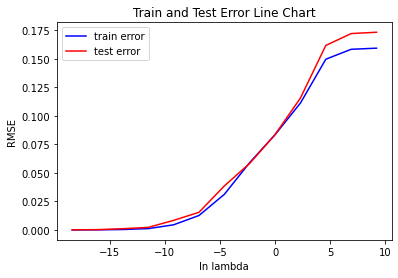

In [17]:
plt.plot(np.log(alphas), rmse_train, color = 'blue', label = 'train error')
plt.plot(np.log(alphas), rmse_test, color = 'red', label = 'test error')
plt.title('Train and Test Error Line Chart')
plt.xlabel('ln lambda')
plt.ylabel('RMSE')
plt.legend()
plt.show()

# Run the algorithm for 100 times

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

dic = {'#run': [], 'lambda': [], 'rmse_test':[], 'rmse_train':[], 'weight':[]}
rmse = pd.DataFrame(dic)

for i in range(100):
    x_train, x_test, t_train, t_test = train_test_split(x1, t1, test_size = 0.7, train_size = 0.3, random_state = None)
    
    alphas = np.logspace(start = -8, stop = 4, num = 13)
    #alphas are array([1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04])
    
    #Transformed data with transformation function(fi2 = [1, x, x^2, ..., x^10])
    poly = PolynomialFeatures(degree = 10, include_bias = True)
    train_data_transformation = poly.fit_transform(x_train[:, np.newaxis]) #add a new column instead of reshape(-1,1)
    test_data_transformation = poly.fit_transform(x_test[:, np.newaxis])

    for j in alphas:
        model = Ridge(alpha = j)
        model.fit(train_data_transformation, t_train)
    
        t_train_pred = model.predict(train_data_transformation)
        rmse_train = np.sqrt(mean_squared_error(t_train, t_train_pred))
    
        t_test_pred = model.predict(test_data_transformation)
        rmse_test = np.sqrt(mean_squared_error(t_test, t_test_pred))
        
        
        new_row = pd.Series(data={'#run': i+1, 'lambda': j, 'rmse_test': rmse_test, 'rmse_train': rmse_train, 'weight' : model.coef_}, name = 'sth')
        rmse = rmse.append(new_row, ignore_index=True)

In [19]:
rmse_summary = rmse.groupby(['lambda'], as_index=False)['rmse_test', 'rmse_train'].mean()
print(rmse_summary)

          lambda  rmse_test  rmse_train
0   1.000000e-08   0.000150    0.000017
1   1.000000e-07   0.000348    0.000078
2   1.000000e-06   0.001348    0.000345
3   1.000000e-05   0.003105    0.001260
4   1.000000e-04   0.009996    0.004608
5   1.000000e-03   0.019677    0.012986
6   1.000000e-02   0.043064    0.031889
7   1.000000e-01   0.067376    0.055775
8   1.000000e+00   0.089033    0.077622
9   1.000000e+01   0.117749    0.105438
10  1.000000e+02   0.160805    0.148709
11  1.000000e+03   0.171697    0.160038
12  1.000000e+04   0.172950    0.161349


Minimum average RMSE for the test data is occurred when alpha is 1e-5.

### W for each lambda

In [20]:
minErr = rmse.loc[rmse.groupby('lambda')['rmse_test'].idxmin()]
for i, item in minErr.iterrows():
    print("Alpha: ", item['lambda'], "\nRMSE_test: ", item['rmse_test'], "\nW= ", item['weight'])
    print('-----------------------------------------------------------------------------')

Alpha:  1e-08 
RMSE_test:  8.579420801432824e-06 
W=  [ 0.00000000e+00  3.11698957e+00 -6.08578144e+00  3.83920218e+00
  3.84122512e-01 -4.10069260e-01  4.61514287e-02  2.04321923e-01
 -3.98268251e-03 -1.62802270e-01  7.17957002e-02]
-----------------------------------------------------------------------------
Alpha:  1e-07 
RMSE_test:  6.004013815092604e-05 
W=  [ 0.          3.10759455 -5.99418566  3.50923431  0.84347621 -0.47698303
 -0.22381121  0.15618305  0.16318047 -0.03017697 -0.05474717]
-----------------------------------------------------------------------------
Alpha:  1e-06 
RMSE_test:  0.00018578118764377624 
W=  [ 0.          3.07842974 -5.76758169  2.86152633  1.47958327 -0.30916124
 -0.60529682 -0.12340049  0.32746734  0.32090435 -0.26344824]
-----------------------------------------------------------------------------
Alpha:  1e-05 
RMSE_test:  0.001073068338875139 
W=  [ 0.          2.96393245 -5.09354044  1.59096321  1.79867466  0.47831181
 -0.34033674 -0.48482219 -0

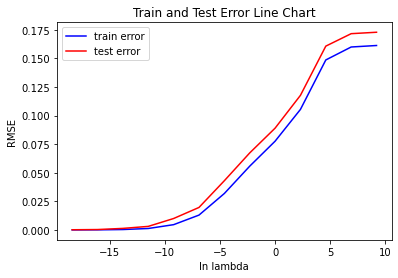

In [21]:
plt.plot(np.log(alphas), 'rmse_train', data = rmse_summary, color = 'blue', label = 'train error')
plt.plot(np.log(alphas), 'rmse_test', data = rmse_summary, color = 'red', label = 'test error')
plt.title('Train and Test Error Line Chart')
plt.xlabel('ln lambda')
plt.ylabel('RMSE')
plt.legend()
plt.show()

Alpha:  1e-05 
RMSE:  0.0019593157470061805 
W=  [ 0.          2.86619046 -4.55027238  0.66718186  1.89814451  1.06743638
 -0.04875677 -0.69947636 -0.72042051 -0.19625748  0.7143503 ]


[Text(0.5, 1.0, 'Model Representation')]

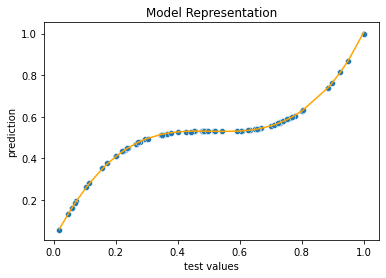

In [22]:
x_train, x_test, t_train, t_test = train_test_split(x1, t1, test_size = 0.7, train_size = 0.3, random_state = None)

poly = PolynomialFeatures(degree = 10, include_bias = True)
train_data_transformation = poly.fit_transform(x_train[:, np.newaxis]) #add a new column instead of reshape(-1,1)
test_data_transformation = poly.fit_transform(x_test[:, np.newaxis])

model = Ridge(alpha = alphas[3], normalize = True).fit(train_data_transformation, t_train)

t_test_pred = model.predict(test_data_transformation)
selected_rmse = np.sqrt(mean_squared_error(t_test, t_test_pred))

print("Alpha: ", 1e-5, "\nRMSE: ", selected_rmse, "\nW= ", model.coef_)

sns.scatterplot(x_test, t_test)
ax = sns.lineplot(x_test, t_test_pred, color="orange")
ax.set(xlabel='test values', ylabel='prediction')
ax.set(title='Model Representation')

# 3-A-2
## K_fold_CV
## Run the algorithm for once

In [23]:
from sklearn.model_selection import KFold

In [24]:
x_KFold, x_test, t_KFold, t_test = train_test_split(x1, t1, test_size = 0.7, train_size = 0.3)
x_KFold.shape, t_KFold.shape, x_test.shape, t_test.shape

((30,), (30,), (70,), (70,))

In [25]:
alphas = np.logspace(start = -8, stop = 4, num = 13)

poly = PolynomialFeatures(degree = 10)
KFold_data_transformation = poly.fit_transform(x_KFold[:, np.newaxis]) #add a new column instead of reshape(-1,1)
test_data_transformation = poly.fit_transform(x_test[:, np.newaxis])

In [26]:
rmse_train = []
rmse_validation = []
rmse_test = []

mean_train_error = []
mean_validation_error = []

kf = KFold(n_splits=10, shuffle=False)

for i in alphas:
    for train_index, validation_index in kf.split(x_KFold, t_KFold):
        
        x_train, x_validation = KFold_data_transformation[train_index], KFold_data_transformation[validation_index]
        t_train, t_validation = t_KFold[train_index], t_KFold[validation_index]
        
        model = Ridge(alpha = i)
        model.fit(x_train, t_train)
        
        t_train_pred = model.predict(x_train)
        train__rmse = rmse_train.append(np.sqrt(mean_squared_error(t_train, t_train_pred)))
    
        t_validation_pred = model.predict(x_validation)
        validation__rmse = rmse_validation.append(np.sqrt(mean_squared_error(t_validation, t_validation_pred)))
    
    t_test_pred = model.predict(test_data_transformation)
    test__rmse = rmse_test.append(np.sqrt(mean_squared_error(t_test, t_test_pred)))
    
    
    # mean errors: (train_error & validation_error)
    mean_train_error.append(np.mean(rmse_train))
    mean_validation_error.append(np.mean(rmse_validation))

## Train, validation and test error chart

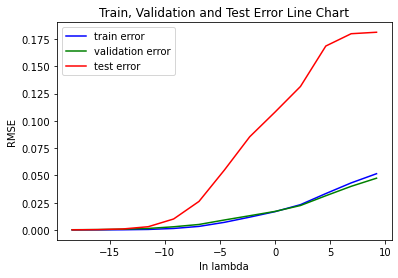

In [27]:
plt.plot(np.log(alphas), mean_train_error, color = 'blue', label = 'train error')
plt.plot(np.log(alphas), mean_validation_error, color = 'green', label = 'validation error')
plt.plot(np.log(alphas), rmse_test, color = 'red', label = 'test error')

plt.title('Train, Validation and Test Error Line Chart')
plt.xlabel('ln lambda')
plt.ylabel('RMSE')
plt.legend()
plt.show()

## Run the algorithm for 100 times

In [28]:
dic = {'#run': [], 'lambda': [], 'rmse_train':[], 'rmse_validation':[], 'rmse_test':[]}
rmse = pd.DataFrame(dic)

mean_train_error = []
mean_validation_error = []

for i in range(100):
    x_KFold, x_test, t_KFold, t_test = train_test_split(x1, t1, test_size = 0.7, train_size = 0.3)
    
    alphas = np.logspace(start = -8, stop = 4, num = 13)
    
    poly = PolynomialFeatures(degree = 10)
    KFold_data_transformation = poly.fit_transform(x_KFold[:, np.newaxis]) #add a new column instead of reshape(-1,1)
    test_data_transformation = poly.fit_transform(x_test[:, np.newaxis])
    
    kf = KFold(n_splits=10, shuffle=False)
    
    for j in alphas:
        
        for train_index, validation_index in kf.split(x_KFold, t_KFold):
        
            x_train, x_validation = KFold_data_transformation[train_index], KFold_data_transformation[validation_index]
            t_train, t_validation = t_KFold[train_index], t_KFold[validation_index]
        
            model = Ridge(alpha = j)
            model.fit(x_train, t_train)
        
            t_train_pred = model.predict(x_train)
            rmse_train = np.sqrt(mean_squared_error(t_train, t_train_pred))
    
            t_validation_pred = model.predict(x_validation)
            rmse_validation = np.sqrt(mean_squared_error(t_validation, t_validation_pred))
    
        t_test_pred = model.predict(test_data_transformation)
        rmse_test = np.sqrt(mean_squared_error(t_test, t_test_pred))
    
    
        # mean errors: (train_error & validation_error)
        mean_train_error.append(np.mean(rmse_train))
        mean_validation_error.append(np.mean(rmse_validation))
        
        new_row = pd.Series(data={'#run': i+1, 'lambda': j, 'rmse_train':rmse_train, 'rmse_validation':rmse_validation, 'rmse_test': rmse_test}, name = 'sth')
        rmse = rmse.append(new_row, ignore_index=True)

In [29]:
rmse_summary = rmse.groupby(['lambda'], as_index=False)['rmse_train', 'rmse_validation', 'rmse_test', ].mean()
print(rmse_summary)

          lambda  rmse_train  rmse_validation  rmse_test
0   1.000000e-08    0.000018         0.000044   0.000122
1   1.000000e-07    0.000082         0.000143   0.000306
2   1.000000e-06    0.000369         0.000596   0.001277
3   1.000000e-05    0.001329         0.001711   0.002847
4   1.000000e-04    0.004877         0.006321   0.009921
5   1.000000e-03    0.013693         0.014660   0.019109
6   1.000000e-02    0.033026         0.035841   0.042750
7   1.000000e-01    0.057883         0.056966   0.067385
8   1.000000e+00    0.079982         0.075083   0.088312
9   1.000000e+01    0.109602         0.099149   0.117633
10  1.000000e+02    0.153481         0.135076   0.159888
11  1.000000e+03    0.164639         0.144193   0.170212
12  1.000000e+04    0.165924         0.145262   0.171393


[Text(0.5, 1.0, 'Train, Validation and Test Error Line Chart')]

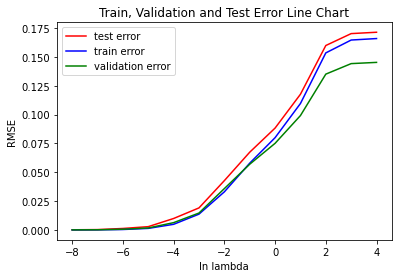

In [30]:
ax = sns.lineplot(data=rmse_summary, x=np.log10(alphas), y='rmse_test',  color='red',  label= 'test error')
ax = sns.lineplot(data=rmse_summary, x=np.log10(alphas), y = 'rmse_train', color='blue', label= 'train error')
ax = sns.lineplot(data=rmse_summary, x=np.log10(alphas), y = 'rmse_validation', color='green', label= 'validation error')

ax.set(xlabel='ln lambda', ylabel='RMSE')
ax.set(title='Train, Validation and Test Error Line Chart')


In [31]:
rmse_validation = []
xKFold, x_test, t_KFold, t_test = train_test_split(x1, t1, test_size = 0.7, train_size = 0.3, random_state = None)

poly = PolynomialFeatures(degree = 10, include_bias = True)
train_data_transformation = poly.fit_transform(x_KFold[:, np.newaxis]) #add a new column instead of reshape(-1,1)
test_data_transformation = poly.fit_transform(x_test[:, np.newaxis])

kf = KFold(n_splits=10, shuffle=False)

for train_index, validation_index in kf.split(x_KFold, t_KFold):
    
    x_train, x_validation = KFold_data_transformation[train_index], KFold_data_transformation[validation_index]
    t_train, t_validation = t_KFold[train_index], t_KFold[validation_index]
        
    model = Ridge(alpha = alphas[0], normalize = True).fit(x_train, t_train)

    t_validation_pred = model.predict(x_validation)
    rmse_validation.append(np.sqrt(mean_squared_error(t_validation, t_validation_pred)))
    
    

print("Alpha: ", 1e-08, "\nMean_rmse_validation", rmse_validation)

Alpha:  1e-08 
Mean_rmse_validation [0.39351157654735175, 0.16392010359825301, 0.1186448922130611, 0.10962003609577971, 0.12573288828956863, 0.19047430765340853, 0.10045655488519112, 0.25954058407177605, 0.13857134892272271, 0.09092236086537728]


# 3-B-1

In [32]:
from mlxtend.evaluate import bias_variance_decomp

In [33]:
def update_data(size):
    # Generate 100 random x in the range of -3 to 3
    x = np.random.uniform(-3, 3, size) 
     
    # Generate random noise with mu=average and sigma=variance
    e = np.random.normal(0, 2, x.size)
     
    # Generate y values as y = func(x) + e
    y = np.zeros(x.size)
     
    for i in range(x.size):
        t[i] = x[i]**3 - 3*(x[i]**2) - x[i] + 3 + e[i]
    
    
    arr = {'X' : X, 'T' : T}
    datas = pd.DataFrame(data = arr)
    datas.to_csv('data.csv')
    
    data = pd.read_csv('./data.csv')
    
    scalar=MinMaxScaler()
    scaled_features=pd.DataFrame(scalar.fit_transform(data), columns=data.columns)

    return

## for n = 20 sample

In [34]:
dic = {'number_of_dataset': [], 'lambda': [], 'bias2': [], 'variance': [], 'rmse_test':[], 'rmse_train':[], 'weight':[]}
report = pd.DataFrame(dic)

rmse_train = []
rmse_test = []

for i in range(50):
    update_data(20)

    x = scaled_features.iloc[:,1]
    x1 = np.array(x)
    t = scaled_features.iloc[:,2]
    t1 = np.array(t)
    
    x_train, x_test, t_train, t_test = train_test_split(x1, t1, train_size = 0.7,  test_size = 0.3, random_state = None)

    poly = PolynomialFeatures(10, include_bias = True)
    train_data_transformation = poly.fit_transform(x_train[:, np.newaxis])
    test_data_transformation = poly.fit_transform(x_test[:, np.newaxis])

    alphas = np.logspace(-8, 4, 13)
    
    for j in alphas:
        model = Ridge(alpha = j, normalize = True).fit(train_data_transformation, t_train)
        
        t_train_pred = model.predict(train_data_transformation)
        rmse_train = np.sqrt(mean_squared_error(t_train, t_train_pred))
    
        t_test_pred = model.predict(test_data_transformation)
        rmse_test = np.sqrt(mean_squared_error(t_test, t_test_pred))
    
        mse20, bias20, variance20 = bias_variance_decomp(model, train_data_transformation, t_train, test_data_transformation, t_test, loss='mse')

        new_row = pd.Series(data={'number_of_dataset': i+1, 'lambda': j, 'bias2': bias20, 'variance': variance20, 'rmse_test': rmse_test, 'rmse_train': rmse_train, 'weight' : model.coef_}, name = 'sth')
        report = report.append(new_row, ignore_index=True)

In [35]:
summary = report.groupby(['lambda'], as_index=False)['bias2', 'variance', 'rmse_test', 'rmse_train'].mean()
summary

,lambda,bias2,variance,rmse_test,rmse_train
0,1.000000e-08,55.894356,154.948685,6.252583,5.102137
1,1.000000e-07,50.800278,86.742024,6.099887,5.121391
2,1.000000e-06,44.825541,28.284478,5.995468,5.145397
3,1.000000e-05,41.389850,22.254031,5.863623,5.166343
4,1.000000e-04,39.510355,9.833935,5.726974,5.186263
5,1.000000e-03,37.943988,6.117516,5.628601,5.208140
6,1.000000e-02,37.644156,3.752491,5.586524,5.229485
7,1.000000e-01,37.005805,2.537438,5.535772,5.249088
8,1.000000e+00,36.325133,1.494142,5.465287,5.273717
9,1.000000e+01,35.696167,0.702034,5.386552,5.317128


In [36]:
minErr = report.loc[report.groupby('lambda')['rmse_test'].idxmin()]
for i, item in minErr.iterrows():
    print("Alpha: ", item['lambda'], "\nRMSE_test: ", item['rmse_test'], "\nW= ", item['weight'])
    print('-----------------------------------------------------------------------------')

Alpha:  1e-08 
RMSE_test:  1.9831996666545257 
W=  [     0.             25.1103364    -198.72847637    446.53251624
    895.92187154  -4140.63125087   1207.08126032   6417.97919408
   -217.38505022 -10436.15242818   6009.33698842]
-----------------------------------------------------------------------------
Alpha:  1e-07 
RMSE_test:  1.5660881548902843 
W=  [   0.          -32.08419058   50.65839812  258.81593291 -516.00685887
 -138.07834535  330.84934594  325.98969993  -34.49650663 -340.1679277
   87.31239855]
-----------------------------------------------------------------------------
Alpha:  1e-06 
RMSE_test:  1.51589502331039 
W=  [    0.             8.47652929   -61.27957411   153.44204114
    96.06680147  -317.16434031  -471.94172089    36.52844396
   884.71317945   972.33958178 -1352.89827577]
-----------------------------------------------------------------------------
Alpha:  1e-05 
RMSE_test:  1.6265104813981013 
W=  [   0.           -2.27089829   53.98549844 -109.26147914  

[Text(0.5, 1.0, 'Bias2 and Variance for different lambda values')]

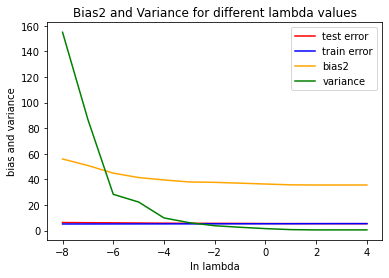

In [37]:
ax = sns.lineplot(data=summary, x=np.log10(alphas), y='rmse_test',  color='red',  label= 'test error')
ax = sns.lineplot(data=summary, x=np.log10(alphas), y='rmse_train', color='blue', label= 'train error')
ax = sns.lineplot(data=summary, x=np.log10(alphas), y='bias2',  color='orange',  label= 'bias2')
ax = sns.lineplot(data=summary, x=np.log10(alphas), y='variance', color='green', label= 'variance')
ax.set(xlabel='ln lambda', ylabel='bias and variance')
ax.set(title='Bias2 and Variance for different lambda values')

## for n = 200 sample

In [38]:
dic = {'number_of_dataset': [], 'lambda': [], 'bias2': [], 'variance': [], 'rmse_test':[], 'rmse_train':[], 'weight':[]}
report = pd.DataFrame(dic)

for i in range(50):
    update_data(200)

    x = scaled_features.iloc[:,1]
    x1 = np.array(x)
    t = scaled_features.iloc[:,2]
    t1 = np.array(t)
    
    x_train, x_test, t_train, t_test = train_test_split(x1, t1, train_size = 0.7,  test_size = 0.3, random_state = None)

    poly = PolynomialFeatures(10, include_bias = True)
    train_data_transformation = poly.fit_transform(x_train[:, np.newaxis])
    test_data_transformation = poly.fit_transform(x_test[:, np.newaxis])

    alphas = np.logspace(-8, 4, 13)
    
    for j in alphas:
        model = Ridge(alpha = j, normalize = True).fit(train_data_transformation, t_train)
        
        t_train_pred = model.predict(train_data_transformation)
        rmse_train = np.sqrt(mean_squared_error(t_train, t_train_pred))
    
        t_test_pred = model.predict(test_data_transformation)
        rmse_test = np.sqrt(mean_squared_error(t_test, t_test_pred))
    
        mse, bias2, variance = bias_variance_decomp(model, train_data_transformation, t_train, test_data_transformation, t_test, loss='mse', num_rounds=200)

        new_row = pd.Series(data={'number_of_dataset': i+1, 'lambda': j, 'bias2': bias2, 'variance': variance, 'rmse_test': rmse_test, 'rmse_train': rmse_train, 'weight' : model.coef_}, name = 'sth')
        report = report.append(new_row, ignore_index=True)

In [39]:
summary = report.groupby(['lambda'], as_index=False)['bias2', 'variance', 'rmse_test', 'rmse_train'].mean()
summary

,lambda,bias2,variance,rmse_test,rmse_train
0,1.000000e-08,197.894117,372.096850,13.643305,11.222796
1,1.000000e-07,182.288926,240.270109,13.141397,11.266364
2,1.000000e-06,172.384882,211.192698,12.688967,11.319193
3,1.000000e-05,160.277571,79.576125,12.401964,11.378545
4,1.000000e-04,151.327667,43.050261,12.074367,11.443018
5,1.000000e-03,146.056724,16.936070,11.821069,11.518323
6,1.000000e-02,143.708983,11.856162,11.715323,11.592657
7,1.000000e-01,140.990633,7.612648,11.602111,11.664742
8,1.000000e+00,137.176967,4.695926,11.440244,11.753282
9,1.000000e+01,134.735205,2.590066,11.336513,11.853299


In [40]:
minErr = report.loc[report.groupby('lambda')['rmse_test'].idxmin()]
for i, item in minErr.iterrows():
    print("Alpha: ", item['lambda'], "\nRMSE_test: ", item['rmse_test'], "\nW= ", item['weight'])
    print('-----------------------------------------------------------------------------')

Alpha:  1e-08 
RMSE_test:  7.36931617851118 
W=  [     0.             60.47343887    513.19614877  -2073.34064367
  -3441.23465511  14937.59396313  -2889.32584687 -17712.87841976
   -954.33544863  22436.92745    -10863.87878502]
-----------------------------------------------------------------------------
Alpha:  1e-07 
RMSE_test:  7.254944743905298 
W=  [    0.           193.78252848  -564.06214644  -197.8358346
   607.66326761  2516.43374249 -1646.45432202 -3846.78729573
   426.75595552  5275.35360986 -2748.41364454]
-----------------------------------------------------------------------------
Alpha:  1e-06 
RMSE_test:  7.247152561561843 
W=  [    0.            24.63039892   357.12122778 -1198.73545733
    37.75256507  1619.18447037   998.14214131  -891.59135217
 -1934.78604796  -934.2700605   1936.02314251]
-----------------------------------------------------------------------------
Alpha:  1e-05 
RMSE_test:  7.246819349478749 
W=  [   0.          135.94366195 -359.92822849   54.22

[Text(0.5, 1.0, 'Bias2 and Variance for different lambda values')]

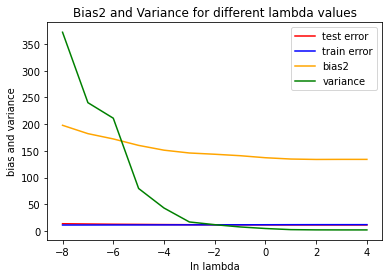

In [41]:
# plot bias2 and variance
ax = sns.lineplot(data=summary, x=np.log10(alphas), y='rmse_test',  color='red',  label= 'test error')
ax = sns.lineplot(data=summary, x=np.log10(alphas), y = 'rmse_train', color='blue', label= 'train error')
ax = sns.lineplot(data=summary, x=np.log10(alphas), y='bias2',  color='orange',  label= 'bias2')
ax = sns.lineplot(data=summary, x=np.log10(alphas), y = 'variance', color='green', label= 'variance')
ax.set(xlabel='ln lambda', ylabel='bias and variance')
ax.set(title='Bias2 and Variance for different lambda values')